# support vector machine

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.svm import SVC

# Datensatz laden
data = load_iris()
features = np.array(data.data)
labels = np.array(data.target)

In [2]:
def plot_data(X, y, kernel_fn="linear", C=1.0, degree=3, gamma='auto'):
    # 2 Grafiken nebeneinander zeigen
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(11,3))
    
    for i in range(2):
        ax = [ax1, ax2][i]
        
        # 2 Mermale für die Anpassung verwenden
        svm = SVC(kernel=kernel_fn, C=C, degree=degree, gamma=gamma)
        svm.fit(X[:, 2*i:2*i+2] ,y)
        
        # Minimale und Maximale Werte aus X nehmen und ein
        # Matrix bilden mit alle Koordinaten mit Abstand 0.05
        x_min, x_max = X[:, 0 + (2 * i)].min() - 1, X[:, 0 + (2 * i)].max() + 1
        y_min, y_max = X[:, 1 + (2 * i)].min() - 1, X[:, 1 + (2 * i)].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.05),
                         np.arange(y_min, y_max, 0.01))

        # Vorhersagen nehmen für alle Koordinaten
        Z = svm.predict(np.c_[xx.ravel(), yy.ravel()])

        # Hintergrund färben für jede Punkt aus xx,yy
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=plt.cm.summer)
        
        # Daten auch als Punkte plotten
        ax.scatter(X[:, 0 + (2 * i)], 
                   X[:, 1 + (2 * i)], 
                   c=y, cmap=plt.cm.summer, 
                   edgecolors='black')
        ax.get_xaxis().set_ticks([])
        ax.get_yaxis().set_ticks([])
    
    ax1.set(ylabel='Sepalum Plot', 
            title = "Kernel Function: %s \n C: %.2f \n gamma: %s " % 
                  (kernel_fn, C, str(gamma)))
    ax2.set(ylabel='Petalum Plot')

    plt.show()

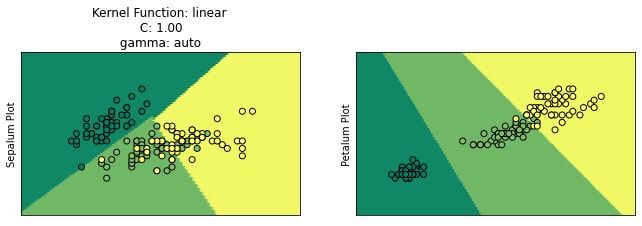

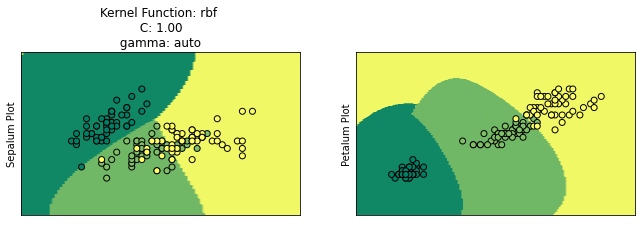

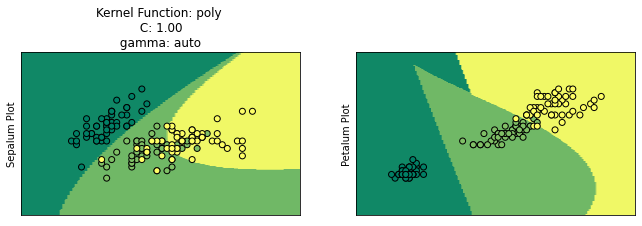

In [3]:
# hier Kernelfunktion anpassen - 'linear', 'poly' and 'rbf'
plot_data(features, labels, kernel_fn="linear")
plot_data(features, labels, kernel_fn="rbf")
plot_data(features, labels, kernel_fn="poly")

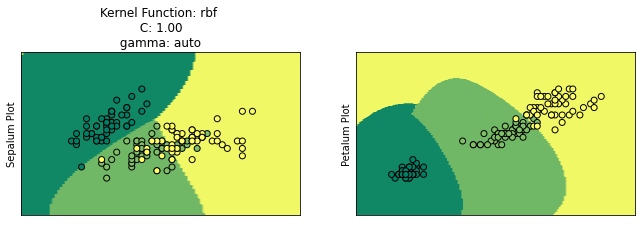

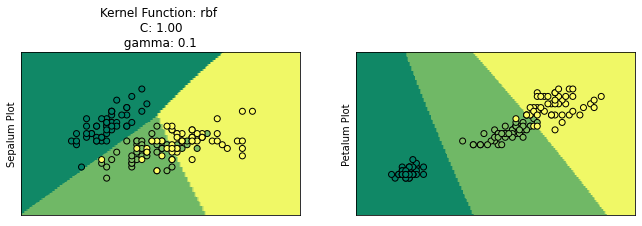

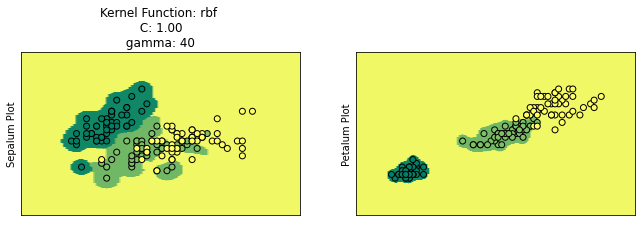

In [4]:
plot_data(features, labels, kernel_fn="rbf", gamma='auto')
plot_data(features, labels, kernel_fn="rbf", gamma=0.1)
plot_data(features, labels, kernel_fn="rbf", gamma=40)

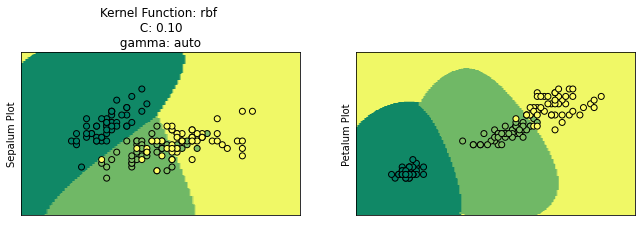

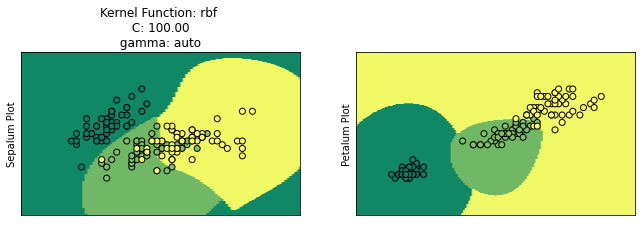

In [5]:
plot_data(features, labels, kernel_fn="rbf", C=0.1)
plot_data(features, labels, kernel_fn="rbf", C=100)